<h1>Data Visualization</h1>

<h3>Import Person Gender-Height-Weight-Body Data Set</h3>

In [1]:
import pandas as pd
s = pd.read_csv('students.csv', names=['Gender','Height','Weight','Index'])
s.head(5)
s.tail(5)

,Gender,Height,Weight,Index
85,Male,198,50,0
86,Female,175,141,5
87,Male,145,117,5
88,Female,159,104,5
89,Female,185,140,5


<h3>Import Wine Data</h3>

In [2]:
wine_reviews = pd.read_csv('winemag-data_first150k.csv', index_col=0)
wine_reviews.tail()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


<h2>Matplotlib</h2>

In [3]:
import matplotlib.pyplot as plt

<h3>Scatter Plot</h3>

Text(0, 0.5, 'Weight')

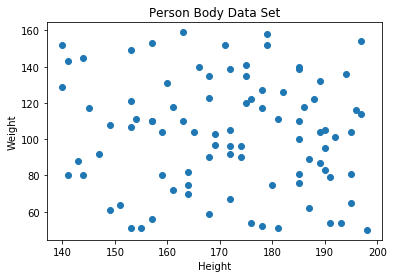

In [4]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the Height against the Weight
ax.scatter(s['Height'], s['Weight'])
# set a title and labels
ax.set_title('Person Body Data Set')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')


Text(0, 0.5, 'Weight')

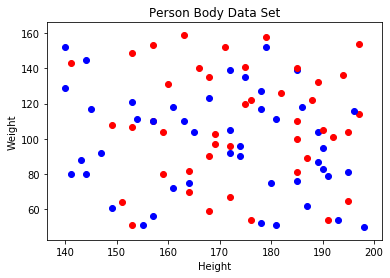

In [43]:
#create color dictionary
colors = {'Female':'red','Male':'blue'}

#create a figure and axis
#fig -> ax
fig, ax = plt.subplots()

#scatter the x, y
#scatter the reading score and writing score
for i in range(len(s['Height'])):
    ax.scatter(s['Height'][i], s['Weight'][i], color= colors[s['Gender'][i]])
ax.set_title('Person Body Data Set')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')

<h3>Line Chart</h3>

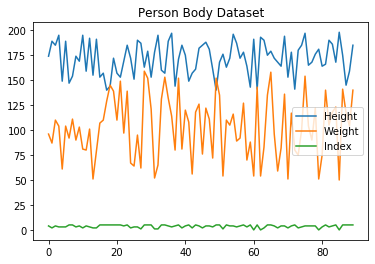

In [12]:
# get columns to plot
columns = s.columns.drop(['Gender'])
# create x data
x_data = range(0, s.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, s[column], label=column)
# set title and legend
ax.set_title('Person Body Dataset')
ax.legend()

<h3>Histogram</h3>

Text(0, 0.5, 'Frequency')

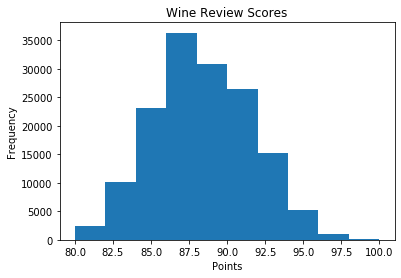

In [13]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(wine_reviews['points'])
# set title and labels
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

In [14]:
wine_reviews['points'].value_counts() 

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64

<h3>Bar Chart</h3>

Text(0, 0.5, 'Frequency')

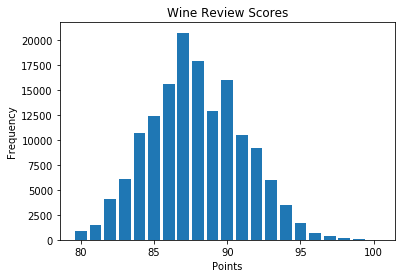

In [15]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = wine_reviews['points'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Wine Review Scores') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')


<h2>Pandas Visualization</h2>

<h3>Scatter Plot</h3>

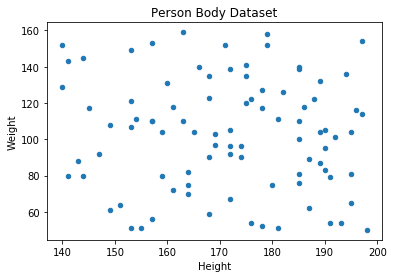

In [17]:
s.plot.scatter(x='Height', y='Weight', title='Person Body Dataset')

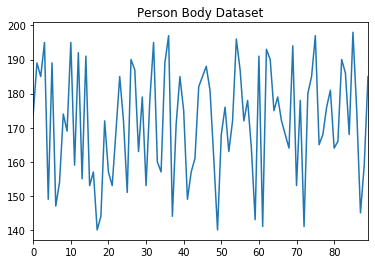

In [18]:
s['Height'].plot.line(title='Person Body Dataset')

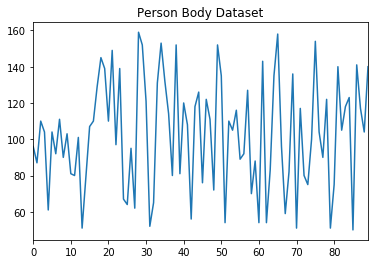

In [19]:
s['Weight'].plot.line(title='Person Body Dataset')

<h3>Histogram</h3>

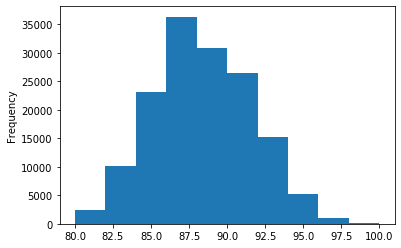

In [20]:
wine_reviews['points'].plot.hist()

<h3>Mulitple Histogram</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4A0943AC8>,
      dtype=object)

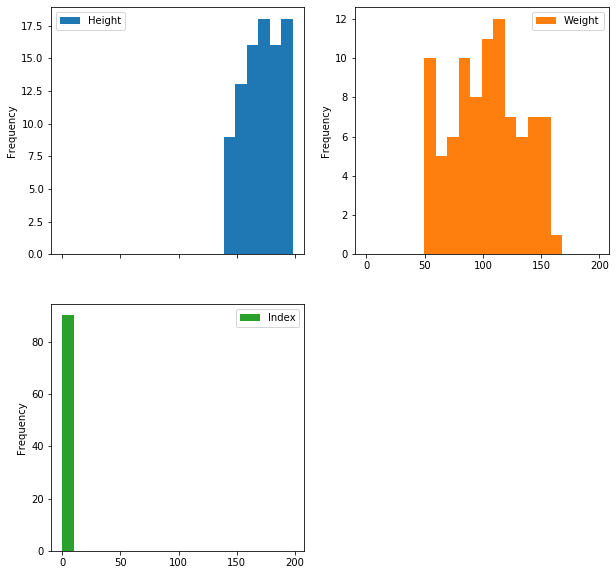

In [21]:
s.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

<h3>Bar Chart</h3>

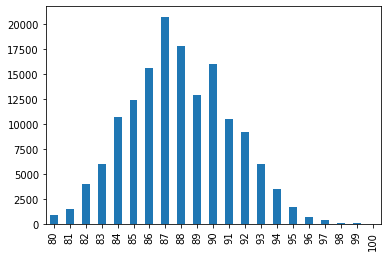

In [22]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

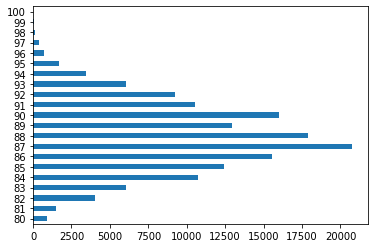

In [23]:
wine_reviews['points'].value_counts().sort_index().plot.barh()

<h3>Categorical Bar Chart</h3>

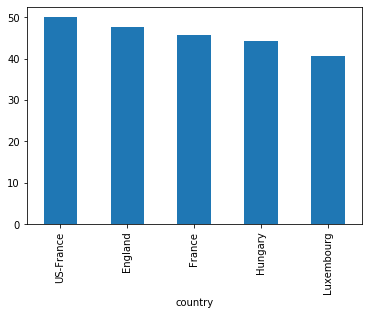

In [24]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.bar()

<h2>Seaborn</h2>

In [25]:
import seaborn as sns

<h3>Scatter plot</h3>

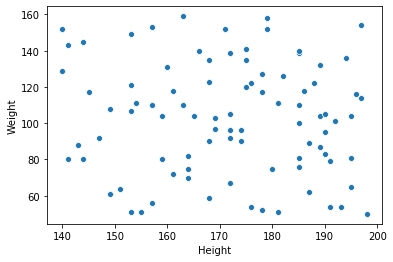

In [27]:
sns.scatterplot(x='Height', y='Weight', data=s)

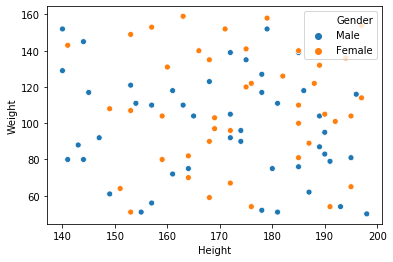

In [28]:
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=s)

<h3>Line Chart</h3>

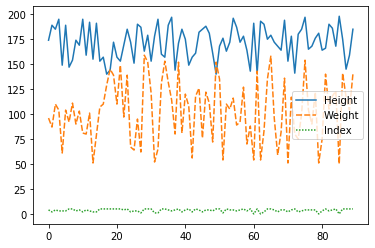

In [29]:
sns.lineplot(data=s.drop(['Gender'], axis=1))

<h3>Histogram</h3>

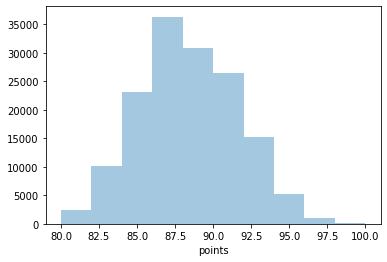

In [30]:
sns.distplot(wine_reviews['points'], bins=10, kde=False)

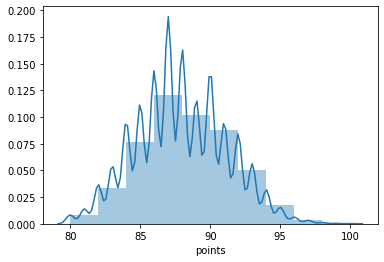

In [31]:
sns.distplot(wine_reviews['points'], bins=10, kde=True)

<h3>Bar chart</h3>

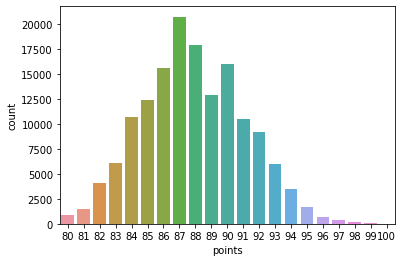

In [32]:
sns.countplot(wine_reviews['points'])

<h3>Boxplot</h3>

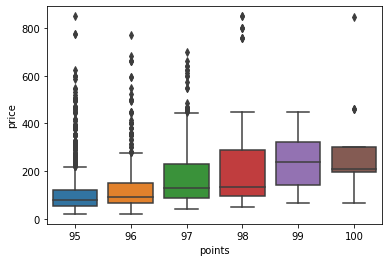

In [34]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot('points', 'price', data=df)

<h3>Heatmap</h3>

In [35]:
import numpy as np

# get correlation matrix
corr = s.corr()
corr

,Height,Weight,Index
Height,1.000000,-0.083674,-0.499507
Weight,-0.083674,1.000000,0.807053
Index,-0.499507,0.807053,1.000000


[None, None, None, None, None, None]

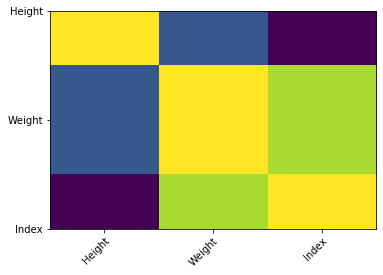

In [36]:
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

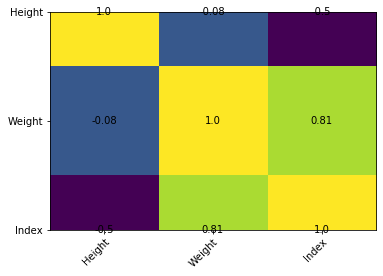

In [38]:
# get correlation matrix
corr = s.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

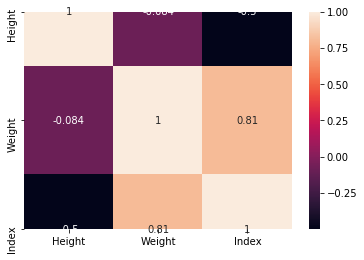

In [39]:
sns.heatmap(s.corr(), annot=True)

<h3>Pairplot</h3>

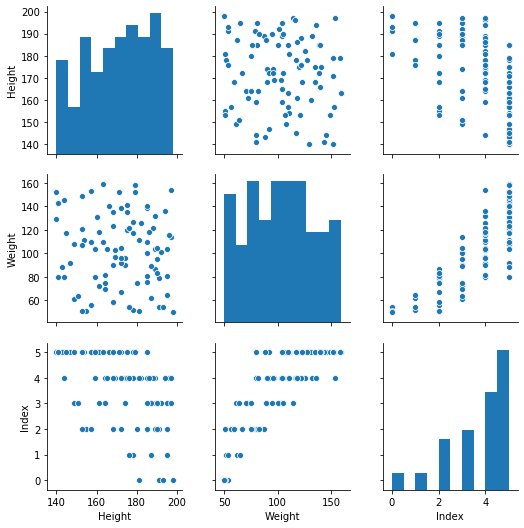

In [40]:
sns.pairplot(s)